In [5]:
import pandas as pd
file_path = "/content/Clean_Dataset.xlsx"
df = pd.read_excel(file_path)

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  
          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.0

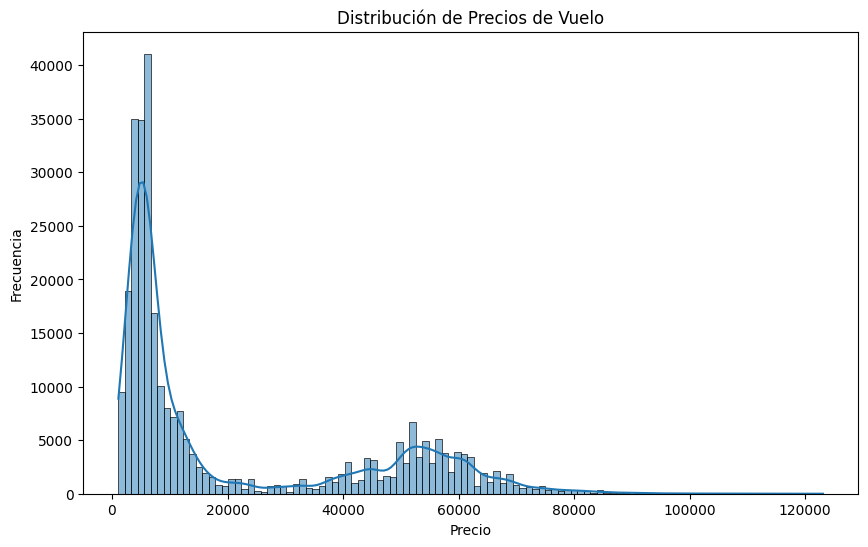

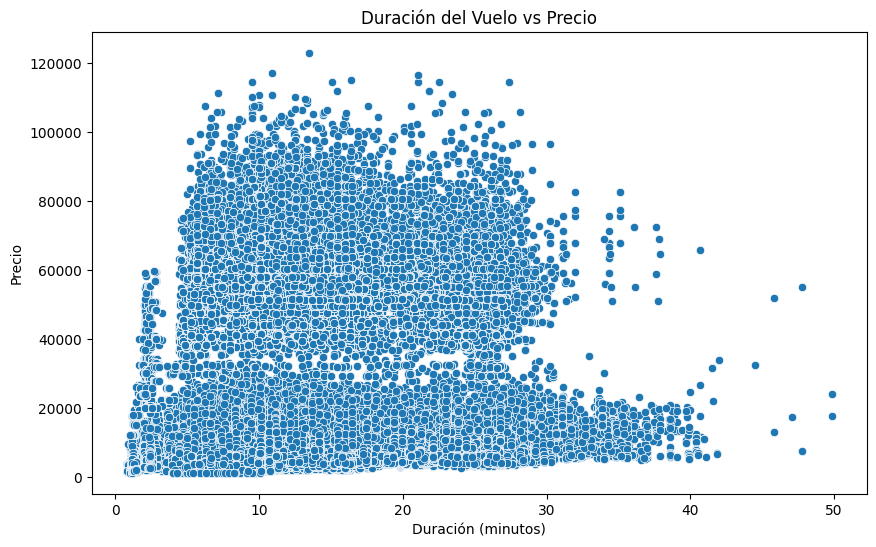

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.head())
print(df.describe())
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribución de Precios de Vuelo')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='price', data=df)
plt.title('Duración del Vuelo vs Precio')
plt.xlabel('Duración (minutos)')
plt.ylabel('Precio')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['airline'] = label_encoder.fit_transform(df['airline'])
df['source_city'] = label_encoder.fit_transform(df['source_city'])
df['destination_city'] = label_encoder.fit_transform(df['destination_city'])
df['duration'] = label_encoder.fit_transform(df['duration'])
df['stops'] = label_encoder.fit_transform(df['stops'])

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

ValueError: could not convert string to float: 'AI-424'

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

comparison = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
print(comparison.head(10))